# Модели обучения

In [3]:
# Импорт основных библиотек
import numpy as np
import pandas as pd
from scipy import stats

# Импорт библиотек построения графиков и диаграмм
from matplotlib import pyplot as plt
import seaborn as sns

# Указание режима отображения диаграмм
%matplotlib inline
##
# Импорт основных библиотек машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler

# Импорт библиотек моделей машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier


# Импорт библиотек отбора признаков
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


# Импорт библиотек оценки моделей машинного обучения
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Импорт библиотек добавления синтетических данных
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 

from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from scipy.io.arff import loadarff 

In [2]:
df1 = pd.read_csv('/home/timur/Classification-Traffic/data/processed/Dataset_15s.csv')
df2 = pd.read_csv('/home/timur/Classification-Traffic/data/processed/Dataset_30s.csv')
df3 = pd.read_csv('/home/timur/Classification-Traffic/data/processed/Dataset_60s.csv')
df4 = pd.read_csv('/home/timur/Classification-Traffic/data/processed/Dataset_120s.csv')

## Отбор признаков:

In [3]:
df2

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,2.218398e+06,2.191528e+06,2.192676e+06,9.000000e+00,1.700000e+01,6.021700e+04,8.611300e+04,6.010773e+02,3.700094e+02,4315.726934,...,1.815741e+03,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,VPN-BROWSING
1,3.517813e+06,3.517813e+06,3.304404e+06,6.000000e+00,7.000000e+00,3.240590e+05,2.174260e+05,1.413912e+03,9.989129e+02,1648.183118,...,8.971722e+03,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,VPN-BROWSING
2,2.412034e+07,2.399044e+07,2.399094e+07,4.000000e+00,1.400000e+01,4.969763e+06,4.934103e+06,1.923852e+04,8.385510e+03,170.395601,...,9.151675e+04,1.498361e+06,4.762398e+06,6.401974e+06,1.910100e+06,1.115996e+06,2.109615e+06,4.800946e+06,1.580859e+06,VPN-BROWSING
3,2.193679e+07,2.180731e+07,2.180667e+07,0.000000e+00,0.000000e+00,3.906748e+06,3.908013e+06,1.706362e+04,8.367869e+03,177.145310,...,9.490836e+04,1.630161e+06,5.281246e+06,1.135516e+07,4.444359e+06,1.308911e+06,2.643748e+06,3.777807e+06,1.233624e+06,VPN-BROWSING
4,2.702070e+05,2.036810e+05,2.440060e+05,1.500000e+01,1.000000e+01,2.714700e+04,6.657200e+04,5.938222e+02,3.631042e+02,3763.781101,...,2.648294e+03,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,VPN-BROWSING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17495,2.901619e+06,2.900973e+06,2.901461e+06,2.900973e+06,2.901461e+06,2.900973e+06,2.901461e+06,2.900973e+06,2.901461e+06,1.378541,...,1.674554e+06,2.901004e+06,2.901004e+06,2.901004e+06,0.000000e+00,2.900815e+06,2.900815e+06,2.900815e+06,0.000000e+00,VPN-VOIP
17496,2.999965e+07,2.999744e+07,2.999929e+07,1.173127e+02,6.692126e+01,2.826351e+04,2.462598e+04,1.987456e+04,1.988017e+04,100.679593,...,6.362268e+03,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,VPN-VOIP
17497,2.998619e+07,2.998181e+07,2.998220e+07,1.413119e+01,1.891486e+01,2.400301e+04,5.060381e+04,1.762960e+04,1.732074e+04,114.507787,...,5.776943e+03,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,VPN-VOIP
17498,2.011593e+07,2.007749e+07,2.007751e+07,1.003845e+07,1.003852e+07,1.003904e+07,1.003900e+07,1.000000e+07,1.000000e+07,0.298271,...,5.456375e+06,1.003845e+07,1.000000e+07,1.003904e+07,4.134364e+02,1.000007e+07,1.000000e+07,1.000062e+07,3.838727e+02,VPN-VOIP


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:, :23], df2['class1'], 
                                                    test_size=0.2, random_state=42,
                                                   stratify=df1['class1'])

In [5]:
X_train

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
10096,2.986067e+07,2.985352e+07,2.954555e+07,3.291402e+02,4.716588e+03,2.981906e+06,2.959711e+06,6.665217e+05,7.308857e+05,3.441564,...,3.461889e+05,3.680582e+05,2.007794e+06,4.872799e+06,8.724267e+06,3.372511e+06,1.125547e+06,1.844547e+06,2.645803e+06,7.575245e+05
8843,1.105116e+06,1.037590e+06,9.821318e+05,1.985660e+04,1.971998e+05,3.434639e+05,3.008925e+05,1.704457e+05,2.323424e+05,15.119761,...,9.436356e+04,1.181617e+05,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
2344,2.567900e+04,0.000000e+00,7.700000e+01,-1.000000e+00,2.700000e+01,-1.000000e+00,5.000000e+01,0.000000e+00,3.850000e+01,155.769306,...,8.559667e+03,1.475910e+04,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
4360,2.444580e+07,2.444580e+07,2.417172e+07,4.870000e+02,2.257550e+05,1.716069e+07,1.738312e+07,1.437988e+06,2.417172e+06,1.186298,...,8.730644e+05,3.231745e+06,2.659829e+06,7.978657e+06,1.837014e+07,9.000127e+06,1.690557e+06,6.993738e+06,1.716069e+07,8.807577e+06
5128,2.400000e+01,2.400000e+01,0.000000e+00,2.400000e+01,-1.000000e+00,2.400000e+01,-1.000000e+00,2.400000e+01,0.000000e+00,83333.333333,...,2.400000e+01,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6704,2.011750e+07,2.007877e+07,2.007858e+07,1.003844e+07,1.003908e+07,1.004033e+07,1.003950e+07,1.000000e+07,1.000000e+07,0.298248,...,4.023500e+06,5.455716e+06,1.003844e+07,1.000000e+07,1.004033e+07,1.334310e+03,9.999525e+06,9.999937e+06,1.000035e+07,5.826551e+02
167,2.970060e+07,2.965018e+07,2.969809e+07,1.000000e+01,2.900000e+01,1.300789e+06,1.590104e+06,1.602712e+05,2.911578e+05,9.730444,...,1.031271e+05,2.519901e+05,1.129630e+06,2.594935e+06,7.051837e+06,1.759911e+06,1.036497e+06,1.103444e+06,1.280379e+06,8.411214e+04
16451,3.022851e+06,3.021873e+06,3.022851e+06,3.021873e+06,3.022851e+06,3.021873e+06,3.022851e+06,3.021873e+06,3.022851e+06,1.323271,...,1.007617e+06,1.744397e+06,3.021929e+06,3.021929e+06,3.021929e+06,0.000000e+00,3.021873e+06,3.021873e+06,3.021873e+06,0.000000e+00
5967,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00


In [30]:
model = LogisticRegression(random_state=42, n_jobs=-1, max_iter=400)

In [31]:
X = df2.iloc[:, :23]
y = df2['class1']

In [33]:
model.fit(X, y)

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400, n_jobs=-1, random_state=42)

In [34]:
model.score(X,y)

0.6328

### Прямой отбор признаков

In [14]:
sfs1 = SequentialFeatureSelector(model, 
           k_features=17, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5, n_jobs=-1)

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  23 | elapsed:    4.2s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    5.1s finished

[2023-06-10 15:24:32] Features: 1/17 -- score: 0.2329142857142857[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  22 | elapsed:    4.4s remaining:    4.4s
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/t

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   28.6s finished

[2023-06-10 15:25:10] Features: 3/17 -- score: 0.3892[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   25.3s finished

[2023-06-10 15:27:49] Features: 9/17 -- score: 0.5580571428571428[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   25.8s finished

[2023-06-10 15:28:14] Features: 10/17 -- score: 0.5569714285714287[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations 

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [15]:
#индексы наиболее лучших признаков
sfs1.k_feature_idx_

(0, 1, 2, 3, 5, 7, 8, 10, 12, 13, 14, 16, 17, 18, 19, 20, 22)

In [16]:
# прогноз оценки
sfs1.k_score_

0.6057142857142856

In [17]:
features1 = list(sfs1.k_feature_names_)
features1

['duration',
 'total_fiat',
 'total_biat',
 'min_fiat',
 'max_fiat',
 'mean_fiat',
 'mean_biat',
 'flowBytesPerSecond',
 'max_flowiat',
 'mean_flowiat',
 'std_flowiat',
 'mean_active',
 'max_active',
 'std_active',
 'min_idle',
 'mean_idle',
 'std_idle']

### Последовательный отбор признаков

In [ ]:
sfs2 = SequentialFeatureSelector(model, 
           k_features=17, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5, n_jobs=-1)

sfs2 = sfs1.fit(X, y)

In [ ]:
#индексы наиболее лучших признаков
sfs2.k_feature_idx_

In [ ]:
# прогноз оценки
sfs2.k_score_

In [ ]:
features2 = list(sfs2.k_feature_names_)
features2

In [ ]:
features1==features2


### Исчерпывающий выбор признаков

In [ ]:
# создаем ExhaustiveFeatureSeLlector объект.
efs = ExhaustiveFeatureSelector(model,
        min_features=17,
        max_features=20,
        scoring='accuracy',
        cv=5, n_jobs=-1)

efs = efs.fit(X, y)

In [ ]:
# выводим выбранные признаки
selected_features = X.columns[list(efs.best_idx_)]
print(selected_features)

# выводим финальную оценку прогнозирования.
print(efs.best_score_)

### Рекурсивное исключение признаков

In [18]:
rfe = RFE(model, n_features_to_select=17)
rfe.fit(X, y)

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

RFE(estimator=LogisticRegression(max_iter=400, n_jobs=-1, random_state=42),
    n_features_to_select=17)

In [35]:
df2.columns

Index(['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat',
       'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat',
       'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active',
       'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1'],
      dtype='object')

In [24]:

# Apply RFE on the training data
X_train_selected = rfe.fit_transform(X, y)

# Fit the logistic regression model with the selected features
model.fit(X_train_selected, y)

# # Make predictions on the test data with the selected features
# X_test_selected = rfe.transform(X_test)
# y_pred = model.predict(X_test_selected)


/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

LogisticRegression(max_iter=400, n_jobs=-1, random_state=42)

In [27]:
model.score(X_train_selected, y)

0.6201142857142857

In [23]:
model.predict(X_test_selected
             )

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Create an instance of RFE and specify the number of selected features
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3)

# Apply RFE on the training data
X_train_selected = rfe.fit_transform(X_train, y_train)

# Fit the logistic regression model with the selected features
model = LogisticRegression()
model.fit(X_train_selected, y_train)

# Make predictions on the test data with the selected features
X_test_selected = rfe.transform(X_test)
y_pred = model.predict(X_test_selected)

In [ ]:
rfe.

In [ ]:
# X_train, y_train - входные и выходные данные с обучающей выборки соответственно.
y_pred = rfe.predict(X_train)

In [9]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True])

In [12]:
selected_features4= X.columns[list(rfe.support_)]
selected_features4

Index(['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat',
       'max_fiat', 'mean_fiat', 'mean_biat', 'flowBytesPerSecond',
       'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat',
       'min_active', 'mean_idle', 'max_idle', 'std_idle'],
      dtype='object')

In [15]:
selected_features==selected_features4

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True])

In [9]:
selected_features = ['duration',
 'total_fiat',
 'total_biat',
 'min_fiat',
 'max_fiat',
 'mean_fiat',
 'mean_biat',
 'flowBytesPerSecond',
 'max_flowiat',
 'mean_flowiat',
 'std_flowiat',
 'mean_active',
 'max_active',
 'std_active',
 'min_idle',
 'mean_idle',
 'std_idle']

In [6]:
df2.columns

Index(['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat',
       'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'min_flowiat', 'max_flowiat', 'mean_flowiat',
       'std_flowiat', 'min_active', 'mean_active', 'max_active', 'std_active',
       'min_idle', 'mean_idle', 'max_idle', 'std_idle', 'class1'],
      dtype='object')

In [7]:
selected_features_4 = ['duration', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat',
       'max_fiat', 'mean_fiat', 'mean_biat', 'flowBytesPerSecond',
       'min_flowiat', 'max_flowiat', 'mean_flowiat', 'std_flowiat',
       'min_active', 'mean_idle', 'max_idle', 'std_idle']

In [10]:
list1 = df2.columns
list2 = selected_features

result = list(set(list1) - set(list2))
print(result)

['flowPktsPerSecond', 'max_idle', 'min_active', 'class1', 'min_biat', 'min_flowiat', 'max_biat']


In [8]:
list1 = df2.columns
list2 = selected_features_4

result = list(set(list1) - set(list2))
print(result)

['flowPktsPerSecond', 'std_active', 'class1', 'min_idle', 'max_biat', 'max_active', 'mean_active']


## Модель обучения

In [91]:
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:, :23], df2['class1'], 
                                                    test_size=0.2, random_state=42,
                                                   stratify=df1['class1'])

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

In [93]:
model1 = LogisticRegression(random_state=17, n_jobs=-1)

In [94]:
model1.fit(X_train, y_train)

/home/timur/Classification-Traffic/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=-1, random_state=17)

In [95]:
model1.score(X_test, y_test)

0.5671428571428572

In [96]:
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1, digits=3))

               precision    recall  f1-score   support

 VPN-BROWSING      0.700     0.298     0.418       500
     VPN-CHAT      0.587     0.518     0.551       488
       VPN-FT      0.436     0.562     0.491       514
     VPN-MAIL      0.638     0.700     0.668       494
      VPN-P2P      0.425     0.320     0.365       515
VPN-STREAMING      0.631     0.651     0.641       510
     VPN-VOIP      0.612     0.942     0.742       479

     accuracy                          0.567      3500
    macro avg      0.576     0.570     0.554      3500
 weighted avg      0.574     0.567     0.552      3500



In [97]:
model2 = GaussianNB()

In [98]:
model2.fit(X_train, y_train)

GaussianNB()

In [99]:
model2.score(X_test, y_test)

0.3802857142857143

In [100]:
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2, digits=3))

               precision    recall  f1-score   support

 VPN-BROWSING      0.367     0.226     0.280       500
     VPN-CHAT      0.529     0.131     0.210       488
       VPN-FT      0.686     0.208     0.319       514
     VPN-MAIL      0.234     0.885     0.370       494
      VPN-P2P      0.385     0.332     0.357       515
VPN-STREAMING      0.796     0.329     0.466       510
     VPN-VOIP      0.691     0.566     0.622       479

     accuracy                          0.380      3500
    macro avg      0.527     0.382     0.375      3500
 weighted avg      0.527     0.380     0.374      3500



In [101]:
model3 = SVC(random_state=17)

In [102]:
model3.fit(X_train, y_train)

SVC(random_state=17)

In [103]:
model3.score(X_test, y_test)

0.5702857142857143

In [104]:
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3, digits=3))

               precision    recall  f1-score   support

 VPN-BROWSING      0.618     0.352     0.448       500
     VPN-CHAT      0.581     0.516     0.547       488
       VPN-FT      0.779     0.411     0.538       514
     VPN-MAIL      0.645     0.279     0.390       494
      VPN-P2P      0.367     0.938     0.528       515
VPN-STREAMING      0.827     0.533     0.648       510
     VPN-VOIP      0.713     0.969     0.821       479

     accuracy                          0.570      3500
    macro avg      0.647     0.571     0.560      3500
 weighted avg      0.647     0.570     0.559      3500



In [105]:
model4 = RandomForestClassifier(random_state=17, n_jobs=-1)

In [106]:
model4.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=17)

In [107]:
model4.score(X_test, y_test)

0.9374285714285714

In [108]:
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4, digits=3))

               precision    recall  f1-score   support

 VPN-BROWSING      0.952     0.920     0.936       500
     VPN-CHAT      0.896     0.865     0.880       488
       VPN-FT      0.912     0.905     0.908       514
     VPN-MAIL      0.960     0.974     0.967       494
      VPN-P2P      0.882     0.953     0.916       515
VPN-STREAMING      0.969     0.965     0.967       510
     VPN-VOIP      1.000     0.981     0.991       479

     accuracy                          0.937      3500
    macro avg      0.939     0.937     0.938      3500
 weighted avg      0.938     0.937     0.937      3500



In [109]:
model5 = GradientBoostingClassifier(random_state=17)

In [110]:
model5.fit(X_train, y_train)

GradientBoostingClassifier(random_state=17)

In [111]:
model5.score(X_test, y_test)

0.8977142857142857

In [112]:
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5, digits=3))

               precision    recall  f1-score   support

 VPN-BROWSING      0.870     0.900     0.885       500
     VPN-CHAT      0.829     0.756     0.791       488
       VPN-FT      0.840     0.815     0.827       514
     VPN-MAIL      0.946     0.962     0.954       494
      VPN-P2P      0.848     0.918     0.882       515
VPN-STREAMING      0.964     0.955     0.960       510
     VPN-VOIP      0.989     0.979     0.984       479

     accuracy                          0.898      3500
    macro avg      0.898     0.898     0.898      3500
 weighted avg      0.897     0.898     0.897      3500



In [113]:
model6 = HistGradientBoostingClassifier(random_state=17)

In [114]:
model6.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=17)

In [115]:
model6.score(X_test, y_test)

0.9368571428571428

In [116]:
y_pred6 = model6.predict(X_test)
print(classification_report(y_test, y_pred6, digits=3))

               precision    recall  f1-score   support

 VPN-BROWSING      0.921     0.928     0.924       500
     VPN-CHAT      0.901     0.857     0.878       488
       VPN-FT      0.914     0.893     0.904       514
     VPN-MAIL      0.970     0.980     0.975       494
      VPN-P2P      0.884     0.961     0.921       515
VPN-STREAMING      0.980     0.963     0.971       510
     VPN-VOIP      0.996     0.977     0.986       479

     accuracy                          0.937      3500
    macro avg      0.938     0.937     0.937      3500
 weighted avg      0.937     0.937     0.937      3500



In [158]:
df1.class1.unique()

array(['VPN-BROWSING', 'VPN-CHAT', 'VPN-FT', 'VPN-MAIL', 'VPN-P2P',
       'VPN-STREAMING', 'VPN-VOIP'], dtype=object)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:, :23], df1['class1'], 
                                                    test_size=0.2, random_state=42,
                                                   stratify=df1['class1'])

label_encoder = LabelEncoder()
label_encoder.fit(y)
y_train_le = label_encoder.fit_transform(y_train)
y_test_le = label_encoder.fit_transform(y_test)


model7 = XGBClassifier(random_state=17, n_jobs=-1)
model7.fit(X_train, y_train_le)


y_pred7 = model7.predict(X_test)
print(classification_report(y_test_le, y_pred7, digits=3))

              precision    recall  f1-score   support

           0      0.905     0.930     0.917       500
           1      0.877     0.866     0.871       500
           2      0.924     0.848     0.884       500
           3      0.946     0.986     0.966       500
           4      0.926     0.956     0.941       500
           5      0.980     0.986     0.983       500
           6      0.998     0.984     0.991       500

    accuracy                          0.937      3500
   macro avg      0.937     0.937     0.936      3500
weighted avg      0.937     0.937     0.936      3500



In [172]:
df1.class1.unique()

array(['VPN-BROWSING', 'VPN-CHAT', 'VPN-FT', 'VPN-MAIL', 'VPN-P2P',
       'VPN-STREAMING', 'VPN-VOIP'], dtype=object)

In [148]:
precision_1 = [0.905, 0.877, 0.924, 0.946, 0.926, 0.980, 0.998]
recall_1 = [0.930, 0.866, 0.848, 0.986, 0.956, 0.986, 0.984]

In [149]:
precision_2 = [0.94, 0.882, 0.886, 0.988, 0.97, 0.96, 0.982]
recall_2 = [0.936, 0.906, 0.939, 0.961, 0.89, 0.982, 1.0]

In [150]:
precision_3 =  [0.922, 0.872, 0.874, 0.968, 0.938, 0.97, 0.958]
recall_3 =  [0.939, 0.934, 0.916, 0.94, 0.856, 0.958, 0.966]

In [151]:
precision_4 = [0.914, 0.876, 0.862, 0.976, 0.966, 0.958, 0.976]
recall_4 = [0.931, 0.958, 0.925, 0.931, 0.827, 0.978, 1.0]

In [ ]:
precision_1 = [0.905, 0.877, 0.924, 0.946, 0.926, 0.980, 0.998]
precision_2 = [0.94, 0.882, 0.886, 0.988, 0.97, 0.96, 0.982]
precision_3 =  [0.922, 0.872, 0.874, 0.968, 0.938, 0.97, 0.958]
precision_4 = [0.914, 0.876, 0.862, 0.976, 0.966, 0.958, 0.976]

In [ ]:
recall_1 = [0.930, 0.866, 0.848, 0.986, 0.956, 0.986, 0.984]
recall_2 = [0.936, 0.906, 0.939, 0.961, 0.89, 0.982, 1.0]
recall_3 =  [0.939, 0.934, 0.916, 0.94, 0.856, 0.958, 0.966]
recall_4 = [0.931, 0.958, 0.925, 0.931, 0.827, 0.978, 1.0]

In [153]:
label_encoder.get_params()

{}

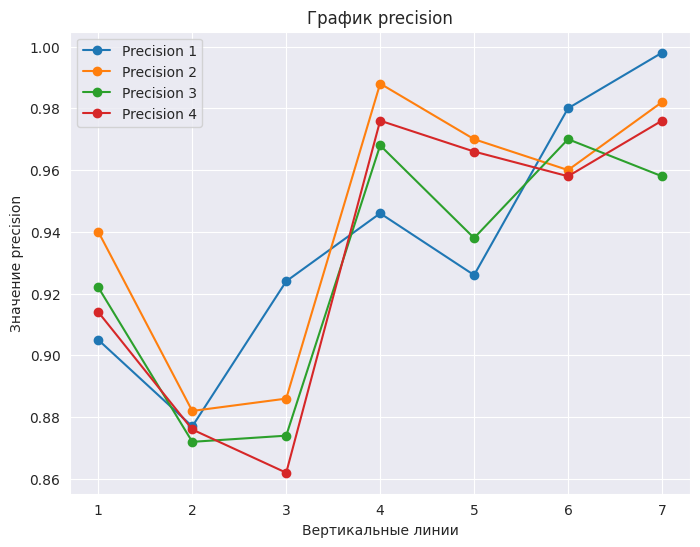

In [155]:
precision_1 = [0.905, 0.877, 0.924, 0.946, 0.926, 0.980, 0.998]
precision_2 = [0.94, 0.882, 0.886, 0.988, 0.97, 0.96, 0.982]
precision_3 = [0.922, 0.872, 0.874, 0.968, 0.938, 0.97, 0.958]
precision_4 = [0.914, 0.876, 0.862, 0.976, 0.966, 0.958, 0.976]

x = range(1, 8)  # Значения по оси X

plt.figure(figsize=(8, 6))  # Установка размеров графика

plt.plot(x, precision_1, marker='o', label='Precision 1')
plt.plot(x, precision_2, marker='o', label='Precision 2')
plt.plot(x, precision_3, marker='o', label='Precision 3')
plt.plot(x, precision_4, marker='o', label='Precision 4')

plt.xticks(x)  # Засечки на оси X

plt.xlabel('Вертикальные линии')
plt.ylabel('Значение precision')
plt.title('График precision')

plt.legend()  # Легенда

plt.show()  # Показать график

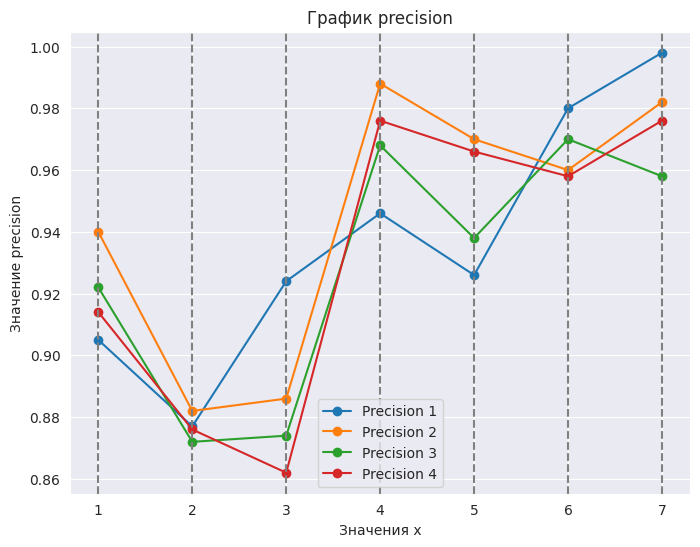

In [157]:
import matplotlib.pyplot as plt

precision_1 = [0.905, 0.877, 0.924, 0.946, 0.926, 0.980, 0.998]
precision_2 = [0.94, 0.882, 0.886, 0.988, 0.97, 0.96, 0.982]
precision_3 = [0.922, 0.872, 0.874, 0.968, 0.938, 0.97, 0.958]
precision_4 = [0.914, 0.876, 0.862, 0.976, 0.966, 0.958, 0.976]

x = range(1, 8)  # Значения по оси X

plt.figure(figsize=(8, 6))  # Установка размеров графика

plt.plot(x, precision_1, marker='o', label='Precision 1')
plt.plot(x, precision_2, marker='o', label='Precision 2')
plt.plot(x, precision_3, marker='o', label='Precision 3')
plt.plot(x, precision_4, marker='o', label='Precision 4')

plt.xticks(x)  # Засечки на оси X

plt.xlabel('Значения x')
plt.ylabel('Значение precision')
plt.title('График precision')

for i in x:
    plt.axvline(x=i, color='gray', linestyle='--')  # Добавление вертикальных линий

plt.legend()  # Легенда

plt.show()  # Показать график


In [ ]:
x = ['VPN-BROWSING', 'VPN-CHAT', 'VPN-FT', 'VPN-MAIL', 'VPN-P2P',
       'VPN-STREAMING', 'VPN-VOIP']

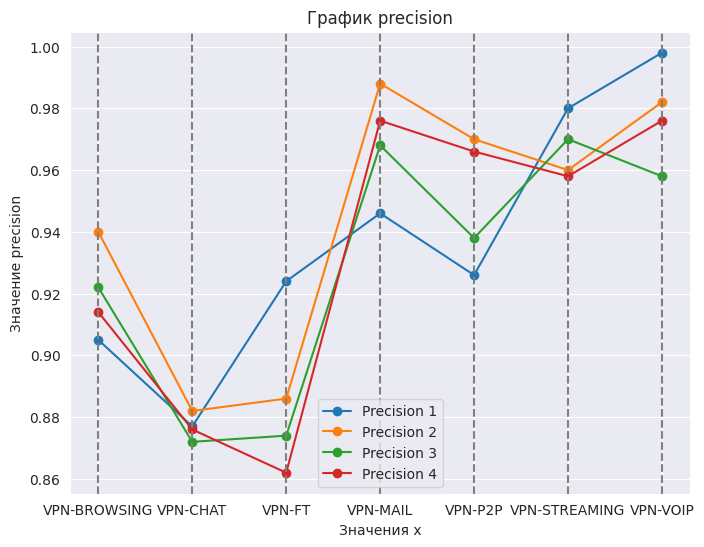

In [159]:
import matplotlib.pyplot as plt

precision_1 = [0.905, 0.877, 0.924, 0.946, 0.926, 0.980, 0.998]
precision_2 = [0.94, 0.882, 0.886, 0.988, 0.97, 0.96, 0.982]
precision_3 = [0.922, 0.872, 0.874, 0.968, 0.938, 0.97, 0.958]
precision_4 = [0.914, 0.876, 0.862, 0.976, 0.966, 0.958, 0.976]

x = range(1, 8)  # Значения по оси X
labels = ['VPN-BROWSING', 'VPN-CHAT', 'VPN-FT', 'VPN-MAIL', 'VPN-P2P', 'VPN-STREAMING', 'VPN-VOIP']

plt.figure(figsize=(8, 6))  # Установка размеров графика

plt.plot(x, precision_1, marker='o', label='Precision 1')
plt.plot(x, precision_2, marker='o', label='Precision 2')
plt.plot(x, precision_3, marker='o', label='Precision 3')
plt.plot(x, precision_4, marker='o', label='Precision 4')

plt.xticks(x, labels)  # Засечки на оси X с метками

# #plt.xlabel('Значения x')
# plt.ylabel('Значение precision')
# plt.title('График precision')

for i in x:
    plt.axvline(x=i, color='gray', linestyle='--')  # Добавление вертикальных линий

plt.legend()  # Легенда

plt.show()  # Показать график


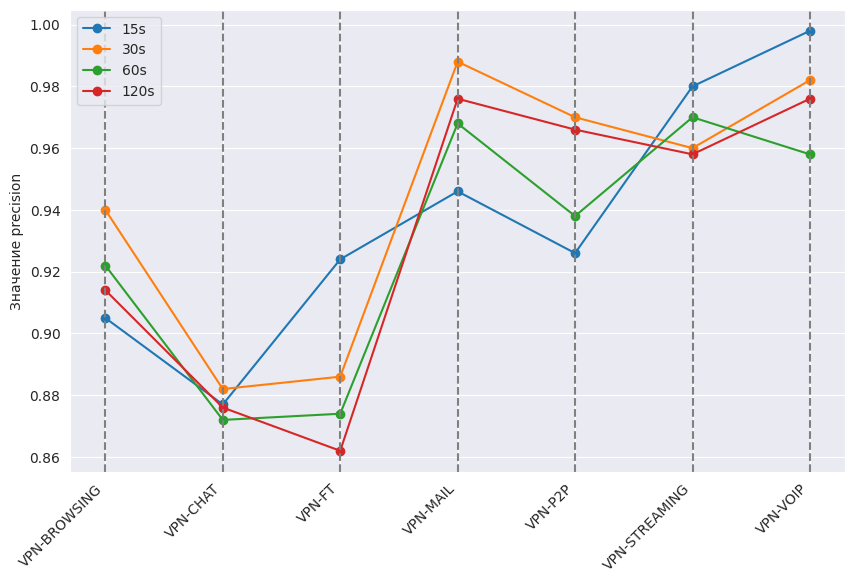

In [174]:
import matplotlib.pyplot as plt

precision_1 = [0.905, 0.877, 0.924, 0.946, 0.926, 0.980, 0.998]
precision_2 = [0.94, 0.882, 0.886, 0.988, 0.97, 0.96, 0.982]
precision_3 = [0.922, 0.872, 0.874, 0.968, 0.938, 0.97, 0.958]
precision_4 = [0.914, 0.876, 0.862, 0.976, 0.966, 0.958, 0.976]

x = range(1, 8)  # Значения по оси X
labels = ['VPN-BROWSING', 'VPN-CHAT', 'VPN-FT', 'VPN-MAIL', 'VPN-P2P', 'VPN-STREAMING', 'VPN-VOIP']

plt.figure(figsize=(10, 6))  # Установка размеров графика

plt.plot(x, precision_1, marker='o', label='Precision 1')
plt.plot(x, precision_2, marker='o', label='Precision 2')
plt.plot(x, precision_3, marker='o', label='Precision 3')
plt.plot(x, precision_4, marker='o', label='Precision 4')

leg = ['15s', '30s', '60s', '120s' ]
plt.xticks(x, labels, rotation=45, ha='right')  # Поворот меток оси X на 45 градусов

# plt.xlabel('Значения x')
plt.ylabel('Значение precision')
# plt.title('График precision')

for i in x:
    plt.axvline(x=i, color='gray', linestyle='--')  # Добавление вертикальных линий

    
plt.legend(leg)
    
#plt.legend()  # Легенда

plt.show()  # Показать график


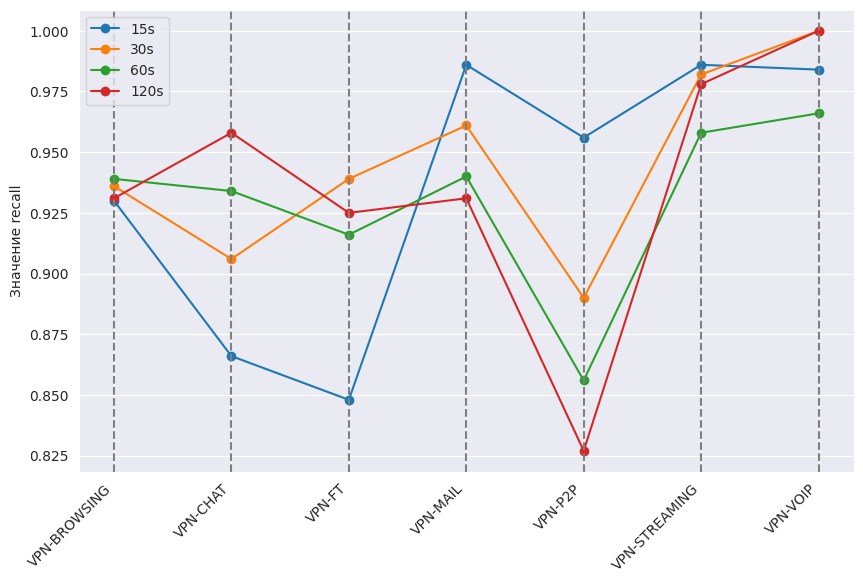

In [175]:
recall_1 = [0.930, 0.866, 0.848, 0.986, 0.956, 0.986, 0.984]
recall_2 = [0.936, 0.906, 0.939, 0.961, 0.89, 0.982, 1.0]
recall_3 =  [0.939, 0.934, 0.916, 0.94, 0.856, 0.958, 0.966]
recall_4 = [0.931, 0.958, 0.925, 0.931, 0.827, 0.978, 1.0]

x = range(1, 8)  # Значения по оси X
labels = ['VPN-BROWSING', 'VPN-CHAT', 'VPN-FT', 'VPN-MAIL', 'VPN-P2P', 'VPN-STREAMING', 'VPN-VOIP']

plt.figure(figsize=(10, 6))  # Установка размеров графика

plt.plot(x, recall_1, marker='o', label='Precision 1')
plt.plot(x, recall_2, marker='o', label='Precision 2')
plt.plot(x, recall_3, marker='o', label='Precision 3')
plt.plot(x, recall_4, marker='o', label='Precision 4')

leg = ['15s', '30s', '60s', '120s' ]
plt.xticks(x, labels, rotation=45, ha='right')  # Поворот меток оси X на 45 градусов

# plt.xlabel('Значения x')
plt.ylabel('Значение recall')
# plt.title('График precision')

for i in x:
    plt.axvline(x=i, color='gray', linestyle='--')  # Добавление вертикальных линий

    
plt.legend(leg)
    
#plt.legend()  # Легенда

plt.show()  # Показать график

In [145]:
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:, :23], df2['class1'], 
                                                    test_size=0.2, random_state=42,
                                                   stratify=df2['class1'])

label_encoder = LabelEncoder()
label_encoder.fit(y)
y_train_le = label_encoder.fit_transform(y_train)
y_test_le = label_encoder.fit_transform(y_test)


model7 = XGBClassifier(random_state=17, n_jobs=-1)
model7.fit(X_train, y_train_le)


y_pred7 = model7.predict(X_test)
print(classification_report(y_test_le, y_pred7, digits=3))

              precision    recall  f1-score   support

           0      0.936     0.940     0.938       500
           1      0.906     0.882     0.894       500
           2      0.939     0.886     0.912       500
           3      0.961     0.988     0.974       500
           4      0.890     0.970     0.928       500
           5      0.982     0.960     0.971       500
           6      1.000     0.982     0.991       500

    accuracy                          0.944      3500
   macro avg      0.945     0.944     0.944      3500
weighted avg      0.945     0.944     0.944      3500



In [146]:
X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:, :23], df3['class1'], 
                                                    test_size=0.2, random_state=42,
                                                   stratify=df3['class1'])

label_encoder = LabelEncoder()
label_encoder.fit(y)
y_train_le = label_encoder.fit_transform(y_train)
y_test_le = label_encoder.fit_transform(y_test)


model7 = XGBClassifier(random_state=17, n_jobs=-1)
model7.fit(X_train, y_train_le)


y_pred7 = model7.predict(X_test)
print(classification_report(y_test_le, y_pred7, digits=3))

              precision    recall  f1-score   support

           0      0.939     0.922     0.930       500
           1      0.934     0.872     0.902       500
           2      0.916     0.874     0.895       500
           3      0.940     0.968     0.954       500
           4      0.856     0.938     0.895       500
           5      0.958     0.970     0.964       500
           6      0.966     0.958     0.962       500

    accuracy                          0.929      3500
   macro avg      0.930     0.929     0.929      3500
weighted avg      0.930     0.929     0.929      3500



In [147]:
X_train, X_test, y_train, y_test = train_test_split(df4.iloc[:, :23], df4['class1'], 
                                                    test_size=0.2, random_state=42,
                                                   stratify=df4['class1'])

label_encoder = LabelEncoder()
label_encoder.fit(y)
y_train_le = label_encoder.fit_transform(y_train)
y_test_le = label_encoder.fit_transform(y_test)


model7 = XGBClassifier(random_state=17, n_jobs=-1)
model7.fit(X_train, y_train_le)


y_pred7 = model7.predict(X_test)
print(classification_report(y_test_le, y_pred7, digits=3))

              precision    recall  f1-score   support

           0      0.931     0.914     0.922       500
           1      0.958     0.876     0.915       500
           2      0.925     0.862     0.892       500
           3      0.931     0.976     0.953       500
           4      0.827     0.966     0.891       500
           5      0.978     0.958     0.968       500
           6      1.000     0.976     0.988       500

    accuracy                          0.933      3500
   macro avg      0.936     0.933     0.933      3500
weighted avg      0.936     0.933     0.933      3500



In [117]:
from sklearn.preprocessing import LabelEncoder

# Создание экземпляра LabelEncoder
label_encoder = LabelEncoder()

# Преобразование текстовых классов в числовые коды
y_encoded = label_encoder.fit_transform(y_train)

# Проверка уникальных значений после преобразования
print(np.unique(y_encoded))

[0 1 2 3 4 5 6]


In [118]:
label_encoder = LabelEncoder()
label_encoder.fit(y)

LabelEncoder()

In [119]:
y_train_le = label_encoder.fit_transform(y_train)
y_test_le = label_encoder.fit_transform(y_test)

In [120]:
model7 = XGBClassifier(random_state=17, n_jobs=-1)

In [121]:
model7.fit(X_train, y_train_le)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [122]:
model7.score(X_test, y_test_le)

0.9414285714285714

In [123]:
y_pred7 = model7.predict(X_test)
print(classification_report(y_test_le, y_pred7, digits=3))

              precision    recall  f1-score   support

           0      0.934     0.936     0.935       500
           1      0.907     0.861     0.883       488
           2      0.923     0.905     0.914       514
           3      0.970     0.978     0.974       494
           4      0.885     0.967     0.924       515
           5      0.980     0.963     0.971       510
           6      1.000     0.981     0.991       479

    accuracy                          0.941      3500
   macro avg      0.943     0.941     0.942      3500
weighted avg      0.942     0.941     0.941      3500



In [ ]:
precision1= 

## Подбор гиперпараметров

In [125]:
model_xgbc = XGBClassifier(random_state = 42, n_jobs=-1)

In [134]:
param_grid = {
'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
'min_child_weight': np.arange(0.0001, 0.5, 0.001),
'gamma': np.arange(0.0, 40.0, 0.005),
'learning_rate': np.arange(0.0005, 0.3, 0.0005),
'subsample': np.arange(0.01, 1.0, 0.01),
'colsample_bylevel': np.round(np.arange(0.1, 1.0, 0.01), decimals=2),
'colsample_bytree': np.arange(0.1, 1.0, 0.01)
}

In [142]:
model_gdsv = GridSearchCV(model_xgbc, param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
model_gdsv.fit(X_train, y_train_le)